In [1]:
%%capture
%run full_data.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p
from dataio import sample_summary_by_date

# Appendix: Data tables and figures

In [3]:
fdata.head()

,PERMNO,date,TICKER,COMNAM,RET,RETX,ME,vwretd,ewretd
0,10001,199801,EWST,ENERGY WEST INC,0.000000,0.000000,21.555000,0.004502,0.015367
1,10001,199802,EWST,ENERGY WEST INC,-0.006944,-0.006944,21.405313,0.073303,0.060460
2,10001,199803,EWST,ENERGY WEST INC,-0.008671,-0.020979,21.008750,0.051301,0.046884
3,10001,199804,EWST,ENERGY WEST INC,0.007143,0.007143,21.158812,0.010904,0.023244
4,10001,199805,EWST,ENERGY WEST INC,-0.014184,-0.014184,20.858687,-0.025748,-0.042571


See filtered_data_1st_decile_out_fsample_NEW.csv for full sample summary.

In [4]:
filtered_data = pd.read_csv('filtered_data_1st_decile_out_fsample_NEW.csv')

In [5]:
data_summary = sample_summary_by_date(filtered_data).round(3)

In [6]:
data_summary

,count,unique,mean,std,min,25%,50%,75%,max
date,,,,,,,,,
199802,6306,6277,0.068,0.142,-0.688,-0.007,0.052,0.128,1.456
199803,6292,6262,0.050,0.150,-0.759,-0.024,0.035,0.111,1.469
199804,6294,6262,0.023,0.160,-0.763,-0.051,0.005,0.074,4.314
199805,6279,6246,-0.047,0.125,-0.743,-0.105,-0.042,0.006,2.306
199806,6246,6213,-0.023,0.142,-0.736,-0.093,-0.023,0.043,1.264
...,...,...,...,...,...,...,...,...,...
201908,3072,3055,-0.050,0.148,-0.670,-0.117,-0.048,0.011,1.544
201909,3073,3056,0.026,0.126,-0.802,-0.027,0.027,0.079,1.280
201910,3055,3038,0.008,0.120,-0.803,-0.043,0.009,0.061,1.567


In [7]:
filtered_data['PORT_MEAN'] = 1

In [8]:
mean_ret = p.compute_strategy_returns(filtered_data,'PORT_MEAN',1)

In [9]:
universe_plot = filtered_data[['date','vwretd','ewretd']].drop_duplicates().set_index('date').sort_index()

In [10]:
universe_plot['Universe ew return'] = mean_ret.values
universe_plot.index = universe_plot.index.astype(str)

In [11]:
universe_plot = universe_plot[11:-1]

In [12]:
universe_plot.plot(colormap='jet',figsize=(10,6),title='Market returns')

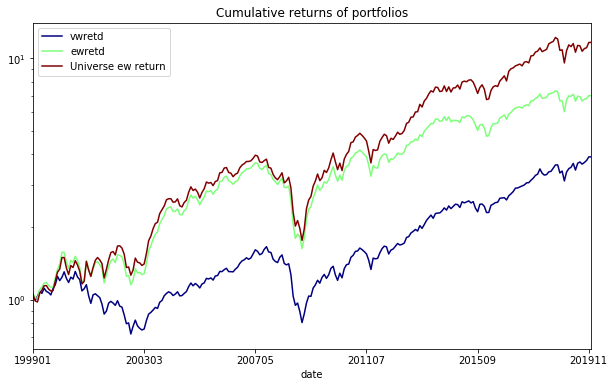

In [13]:
p.plot_cumulative(universe_plot,log_scale=True)

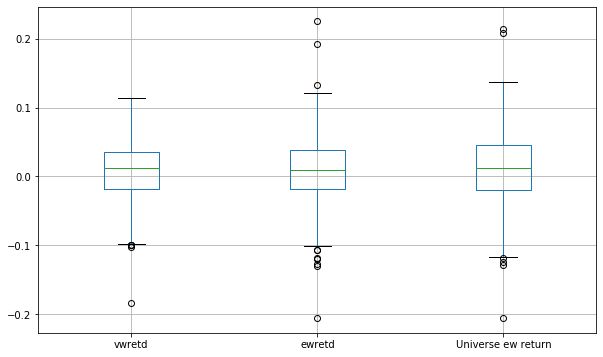

In [14]:
universe_plot.boxplot(figsize=(10,6))

In [15]:
universe_plot.columns = ['vwretd','ewretd','Universe ew']

In [16]:
print(universe_plot.describe().transpose().round(3).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &    max \\
\midrule
vwretd      &  251.0 &  0.006 &  0.043 & -0.185 & -0.018 &  0.012 &  0.035 &  0.114 \\
ewretd      &  251.0 &  0.009 &  0.053 & -0.205 & -0.019 &  0.009 &  0.038 &  0.225 \\
Universe ew &  251.0 &  0.011 &  0.057 & -0.206 & -0.020 &  0.011 &  0.046 &  0.214 \\
\bottomrule
\end{tabular}

